# 1.IMPORTING LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2.Loading the Data

In [2]:
sales = pd.read_csv("../data/fact_sales.csv")
products = pd.read_csv("../data/dim_product.csv")
customers = pd.read_csv("../data/dim_customer.csv")

df = sales.merge(products, on="product_id").merge(customers, on="customer_id")
df['order_date'] = pd.to_datetime(df['order_date'])
df.head()


,order_id,product_id,customer_id,order_date,quantity,price,revenue,name_x,category,brand,name_y,region,gender
0,1,11,46,2025-04-26,5,48.62,243.10,growth,Home,Weaver-Jackson,Brett Guerrero,East Kristin,Male
1,2,16,29,2025-07-04,5,38.99,194.95,and,Home,"Le, Smith and Knox",Mark Bowers,New Carol,Female
2,3,2,14,2025-05-20,4,171.41,685.64,magazine,Home,Conrad Ltd,Sierra Flores,Port Richard,Male
3,4,8,13,2025-06-17,3,110.37,331.11,we,Home,"Lee, Frederick and Martinez",Tammy Chavez,East Sheila,Male
4,5,2,19,2025-04-26,4,432.77,1731.08,magazine,Home,Conrad Ltd,Bradley Allen,Port Laura,Male


# 3.Basic Info

In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     500 non-null    int64         
 1   product_id   500 non-null    int64         
 2   customer_id  500 non-null    int64         
 3   order_date   500 non-null    datetime64[ns]
 4   quantity     500 non-null    int64         
 5   price        500 non-null    float64       
 6   revenue      500 non-null    float64       
 7   name_x       500 non-null    object        
 8   category     500 non-null    object        
 9   brand        500 non-null    object        
 10  name_y       500 non-null    object        
 11  region       500 non-null    object        
 12  gender       500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 50.9+ KB


,order_id,product_id,customer_id,order_date,quantity,price,revenue
count,500.000000,500.000000,500.000000,500,500.000000,500.00000,500.000000
mean,250.500000,11.088000,26.086000,2025-05-30 18:48:57.600000,3.008000,253.30610,777.280420
min,1.000000,1.000000,1.000000,2025-04-18 00:00:00,1.000000,10.02000,17.030000
25%,125.750000,6.000000,13.000000,2025-05-07 00:00:00,2.000000,134.98000,262.977500
50%,250.500000,11.000000,28.000000,2025-05-30 12:00:00,3.000000,252.81500,589.350000
75%,375.250000,16.000000,38.000000,2025-06-23 06:00:00,4.000000,372.13000,1179.210000
max,500.000000,20.000000,50.000000,2025-07-16 00:00:00,5.000000,499.63000,2479.600000
std,144.481833,5.808247,14.536341,NaN,1.449185,140.34651,621.646345


# 4. Monthly Revenue Trend

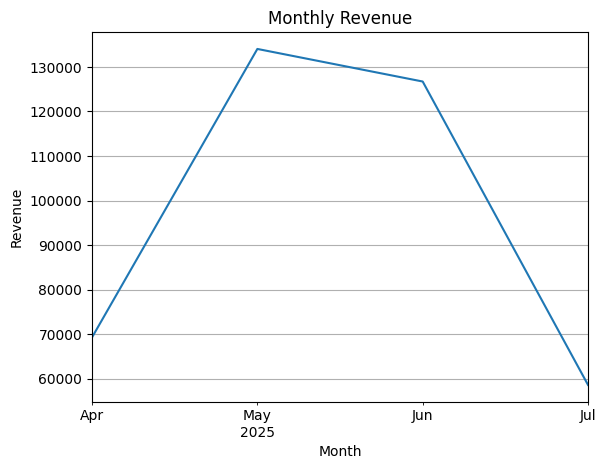

In [5]:
df.groupby(df['order_date'].dt.to_period("M"))['revenue'].sum().plot(kind='line', title='Monthly Revenue')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.grid()
plt.show()


# Insights:
* Revenue increased sharply from April to May 2025, reaching a peak of over $130,000. There was a slight dip in June, but it still maintained good performance. A significant drop occurred in July, indicating either:

* Seasonal slowdown,
* Supply chain or operations issues,
* Or reduced customer engagement.

 

# 5.Orders by Region – Full List

/var/folders/27/1cn8ksm50g53q18n8b1f8v1c0000gn/T/ipykernel_4536/655362613.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_counts.index, y=order_counts.values, palette='viridis')


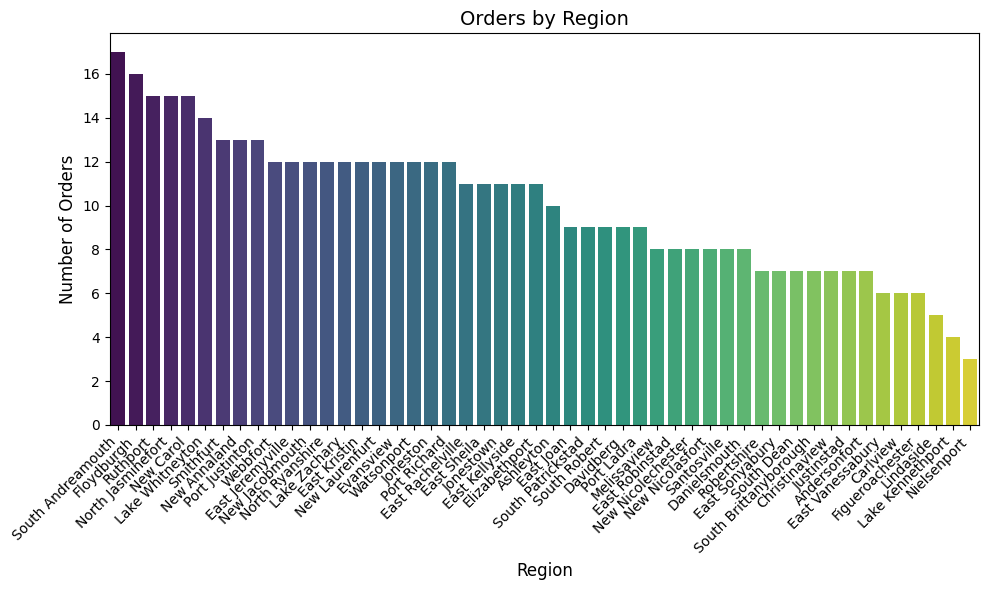

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Widen the plot
order_counts = df['region'].value_counts()

sns.barplot(x=order_counts.index, y=order_counts.values, palette='viridis')
plt.title("Orders by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Insights:
* South Andreamouth, Floydburgh, and Ruthport are the top-performing regions in terms of order volume.

* There’s a long tail of regions with low order counts, indicating sales are not evenly distributed.

* This shows strong concentration of orders in a few geographies.

# 6.Top 10 Regions by Order Count

/var/folders/27/1cn8ksm50g53q18n8b1f8v1c0000gn/T/ipykernel_4536/4007375084.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='Blues_d')


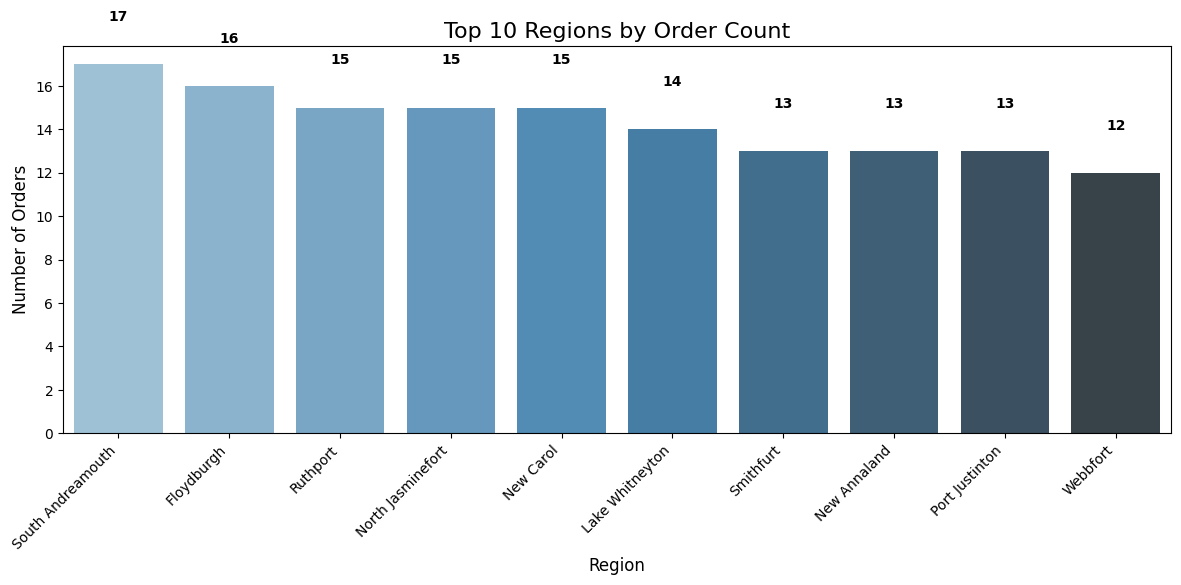

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count orders per region
region_counts = df['region'].value_counts().head(10)  # Only top 10 for better clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='Blues_d')

# Annotate each bar
for i, val in enumerate(region_counts.values):
    plt.text(i, val + 2, str(val), ha='center', fontweight='bold')

plt.title("Top 10 Regions by Order Count", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Insights:
* The top 10 regions contribute almost equally in terms of order volume (ranging from 12 to 17 orders).

* South Andreamouth leads with 17 orders, followed by Floydburgh (16) and Ruthport (15).

* This shows a competitive spread among top regions.